In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load dataset
df = pd.read_csv("Prep_Loan_default.csv")

In [3]:
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,HasMortgage,...,Education_PhD,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,0.833990,0.089693,-1.086833,-0.341492,0.590533,1.341937,0.261771,-0.001526,-0.260753,1,...,0,0,0,0,0,0,0,0,0,1
1,1.701221,-0.823021,-0.044309,-0.731666,-1.285731,-1.343791,-1.308350,1.412793,0.778585,0,...,0,0,0,0,1,0,0,0,0,1
2,0.166888,0.043854,0.022715,-0.775718,-0.968209,0.446694,1.156831,-0.708685,-0.823728,1,...,0,0,0,1,0,0,0,0,0,0
3,-0.767053,-1.303452,-1.168538,1.061875,-1.718715,0.446694,-0.967805,-0.708685,-1.170174,0,...,0,0,0,0,1,0,1,0,0,0
4,1.100830,-1.592855,-1.671921,0.369631,-1.487790,1.341937,-1.052188,0.705634,0.995114,0,...,0,0,0,1,0,0,0,0,0,0


Plots: Histogram (with KDE) for numeric features, countplot for Default.

Summaries: .describe() (mean, median, min, max, quartiles).

Client-friendly insights:

    Age → shows borrower age range.
    
    Income → shows if middle-income dominates.
    
    LoanAmount → typical loan size vs outliers.
    
    CreditScore → prime vs subprime mix.
    
    DTI → proportion of high-risk customers.
    
    InterestRate → secured vs risky loans.
    
    Default → portfolio health (% default).

<h1> Univariate Analysis (single variable distributions) </h1>

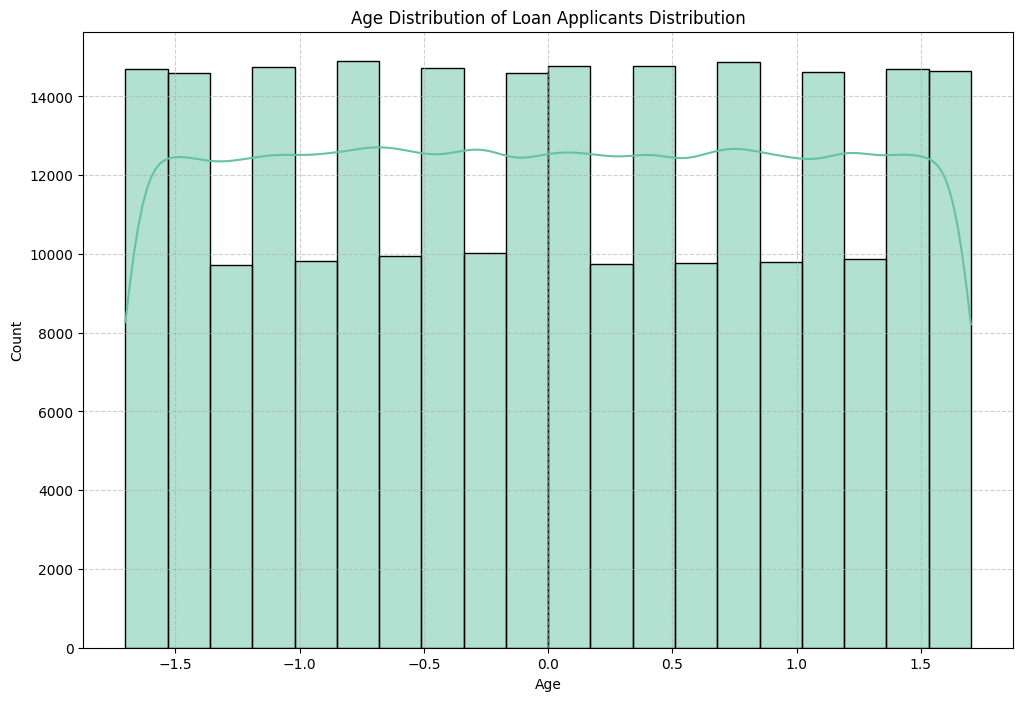


--- Age Summary ---
count    2.553470e+05
mean    -1.555504e-16
std      1.000002e+00
min     -1.700995e+00
25%     -8.337635e-01
50%     -3.324207e-02
75%      8.339895e-01
max      1.701221e+00
Name: Age, dtype: float64


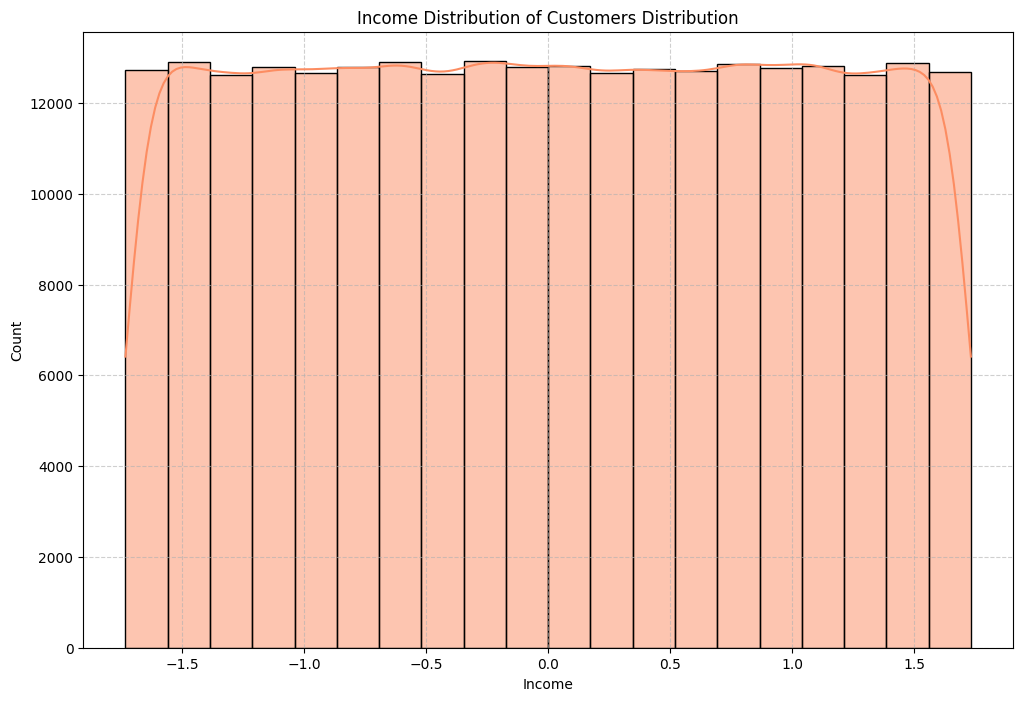


--- Income Summary ---
count    2.553470e+05
mean     3.717628e-17
std      1.000002e+00
min     -1.732398e+00
25%     -8.642522e-01
50%     -8.547763e-04
75%      8.654300e-01
max      1.732408e+00
Name: Income, dtype: float64


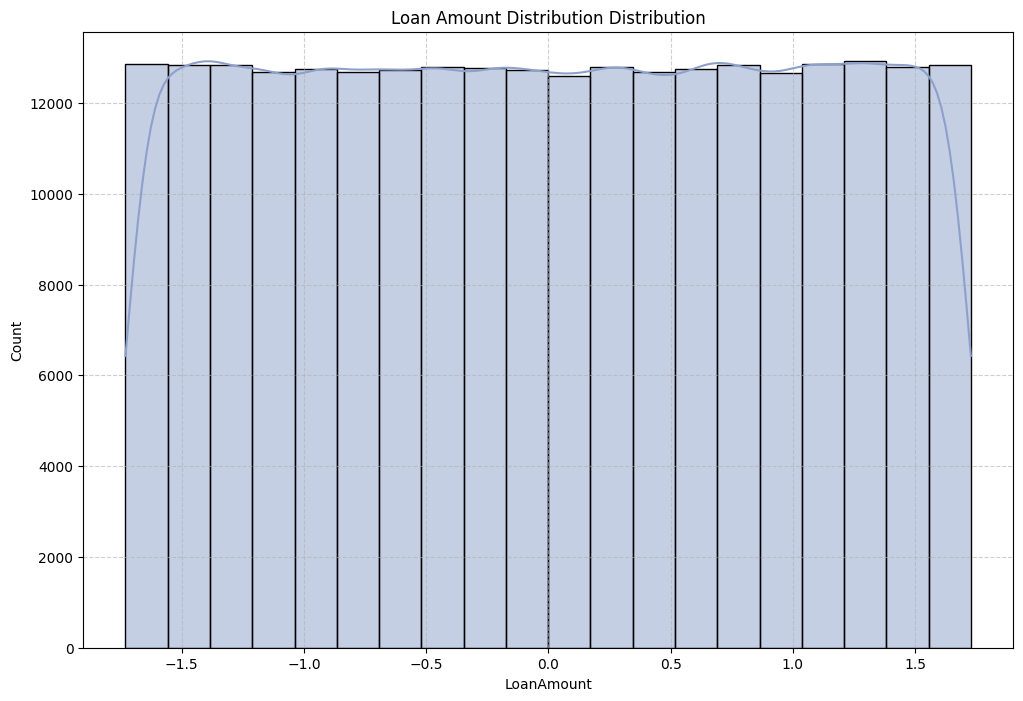


--- LoanAmount Summary ---
count    2.553470e+05
mean     4.112765e-17
std      1.000002e+00
min     -1.730348e+00
25%     -8.670578e-01
50%     -3.227743e-04
75%      8.668216e-01
max      1.728108e+00
Name: LoanAmount, dtype: float64


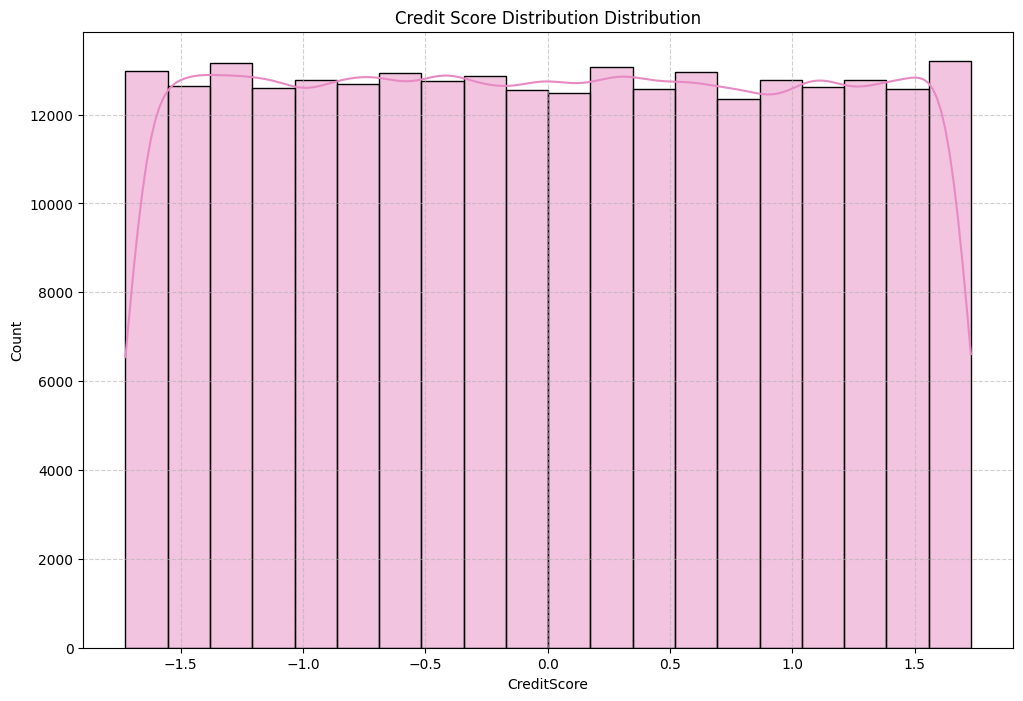


--- CreditScore Summary ---
count    2.553470e+05
mean     2.301256e-16
std      1.000002e+00
min     -1.725980e+00
25%     -8.638217e-01
50%     -1.663564e-03
75%      8.667877e-01
max      1.728946e+00
Name: CreditScore, dtype: float64


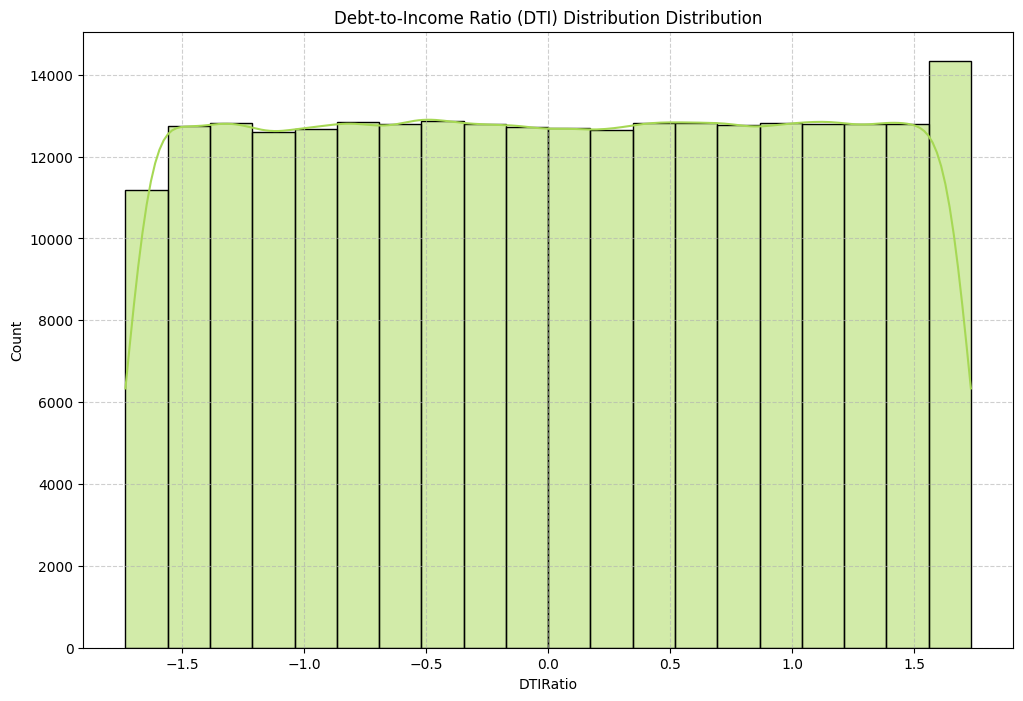


--- DTIRatio Summary ---
count    2.553470e+05
mean     4.730514e-17
std      1.000002e+00
min     -1.733149e+00
25%     -8.670336e-01
50%     -9.183609e-04
75%      8.651968e-01
max      1.731312e+00
Name: DTIRatio, dtype: float64
High DTI customers (>0.6): 33.19%


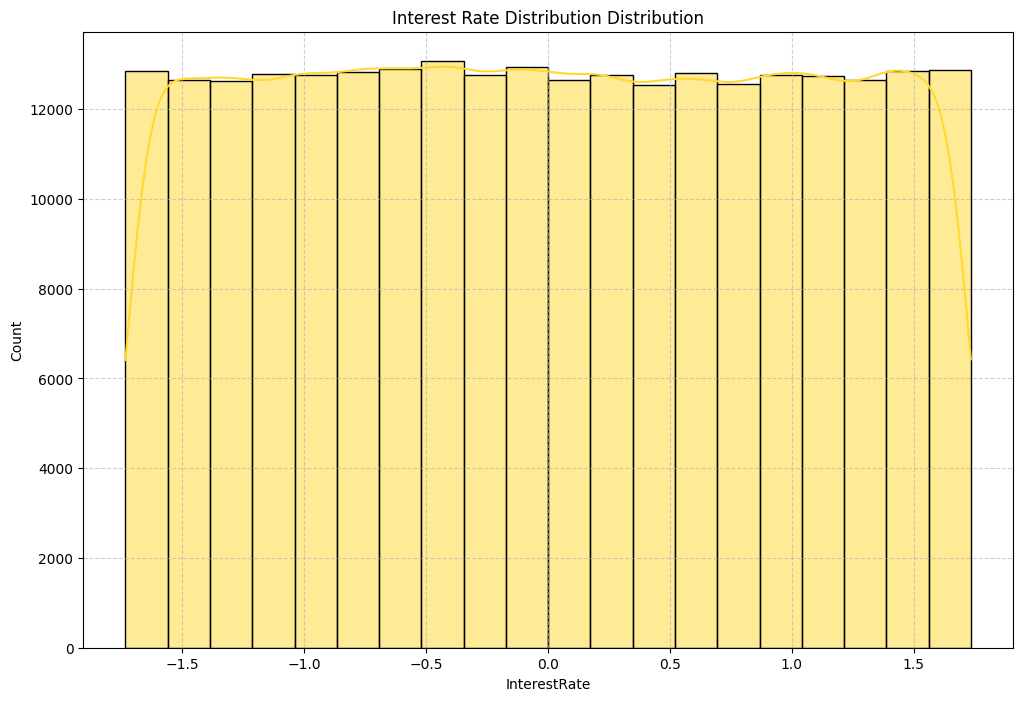


--- InterestRate Summary ---
count    2.553470e+05
mean    -6.622164e-16
std      1.000002e+00
min     -1.731770e+00
25%     -8.623271e-01
50%     -4.938420e-03
75%      8.675186e-01
max      1.733948e+00
Name: InterestRate, dtype: float64


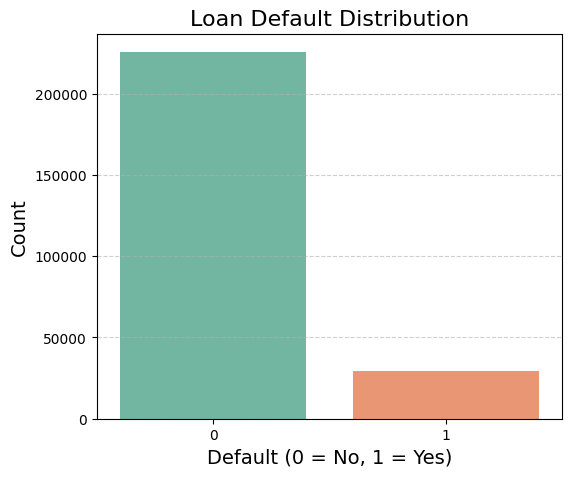


Default Rate: 11.61%


In [4]:
# Numeric columns for univariate
num_cols = {
    "Age": "Age Distribution of Loan Applicants",
    "Income": "Income Distribution of Customers",
    "LoanAmount": "Loan Amount Distribution",
    "CreditScore": "Credit Score Distribution",
    "DTIRatio": "Debt-to-Income Ratio (DTI) Distribution",
    "InterestRate": "Interest Rate Distribution"
}

# define a palette with enough colors
palette = sns.color_palette("Set2", n_colors=len(num_cols))

# Loop through numeric features
for i, (col, title) in enumerate(num_cols.items()):
    if col in df.columns:
        plt.figure(figsize=(12,8))
        sns.histplot(
            df[col], 
            bins=20, 
            kde=True, 
            color=palette[i],   # assign a unique color
            edgecolor="black"
        )
        plt.title(f"{title} Distribution")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.grid(True, linestyle="--", alpha=0.6)
        
        # save image
        #plt.savefig(ANL_DIR / f"{col}_hist.png", bbox_inches="tight", dpi=150)
        plt.show()
        
        # summary
        print(f"\n--- {col} Summary ---")
        print(df[col].describe())
        if col == "DTIRatio":
            high_dti = (df[col] > 0.6).mean() * 100
            print(f"High DTI customers (>0.6): {high_dti:.2f}%")

# Target variable: Default
if "Default" in df.columns:
    plt.figure(figsize=(6,5))
    sns.countplot(x="Default", data=df, palette="Set2")
    plt.title("Loan Default Distribution", fontsize=16)
    plt.xlabel("Default (0 = No, 1 = Yes)", fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    #plt.savefig(ANL_DIR / "Default_distribution.png", bbox_inches="tight", dpi=150)
    plt.show()

    default_rate = df['Default'].mean() * 100
    print(f"\nDefault Rate: {default_rate:.2f}%")

<H1>Bivariate Analysis (feature vs. Default)</h1

Income vs Default → Boxplot (see if median income of defaulters is lower).

LoanAmount vs Default → Boxplot (check if big loans or small loans default more).

CreditScore vs Default → KDE plots (distribution curves for good vs bad borrowers).

DTIRatio vs Default → KDE + bin analysis (see default rate in different DTI ranges).

InterestRate vs Default → KDE (see if high interest → higher defaults).

In [5]:
# Define feature → question/title mapping
features = {
    "Income":"Income vs Default",
    "LoanAmount":"LoanAmount vs Default:",
    "CreditScore":"Credit Score vs Default",
    "DTIRatio":"DTI Ratio vs Default",
    "InterestRate":"Interest Rate vs Default"
}

In [6]:
# Pick a palette with enough unique colors
palette_list = sns.color_palette(palette="pastel", n_colors=len(features))

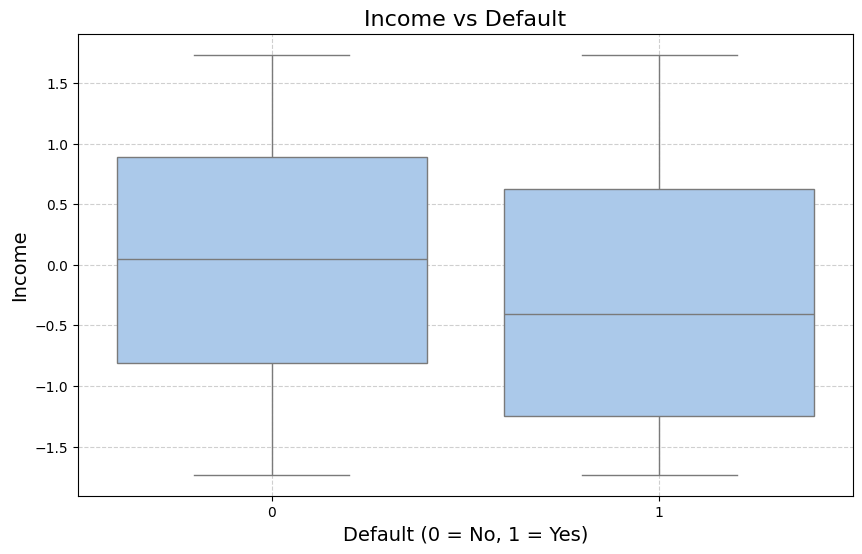

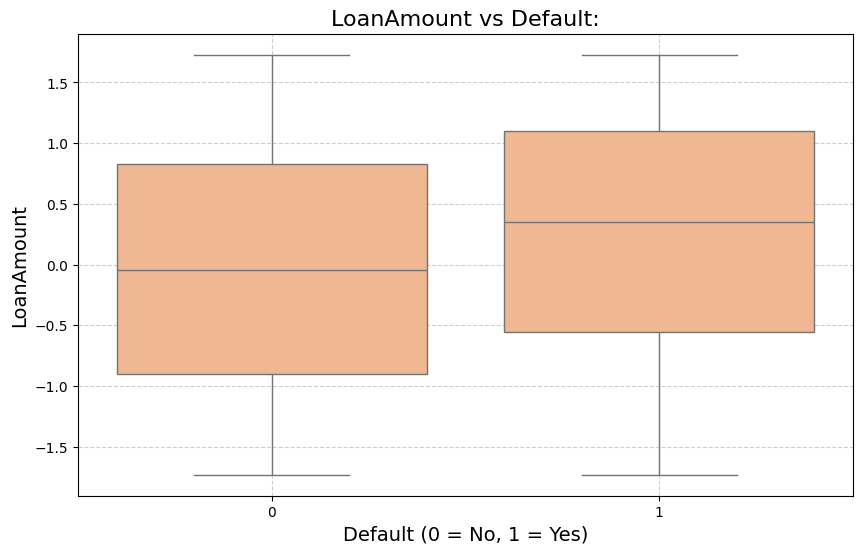

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

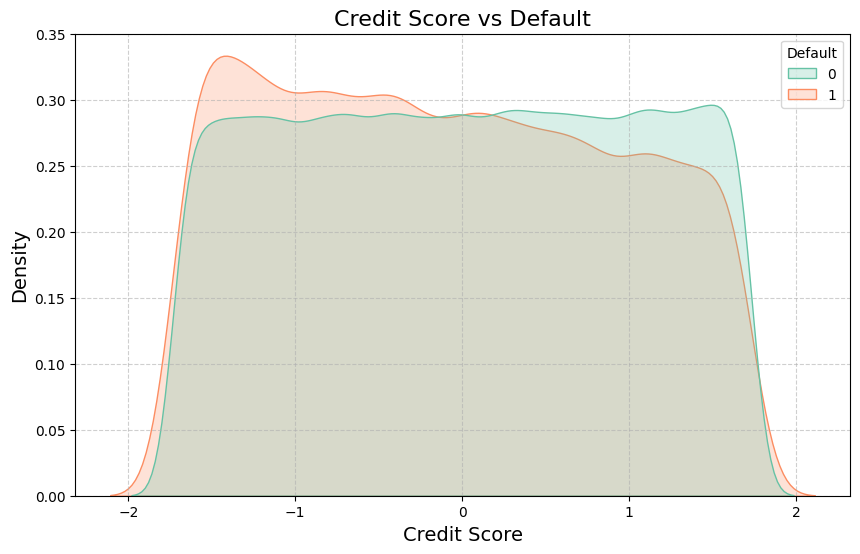


Default Rate by Credit Score Group:
CreditGroup
Low       0.128
Medium    0.116
High      0.104
Name: Default, dtype: float64


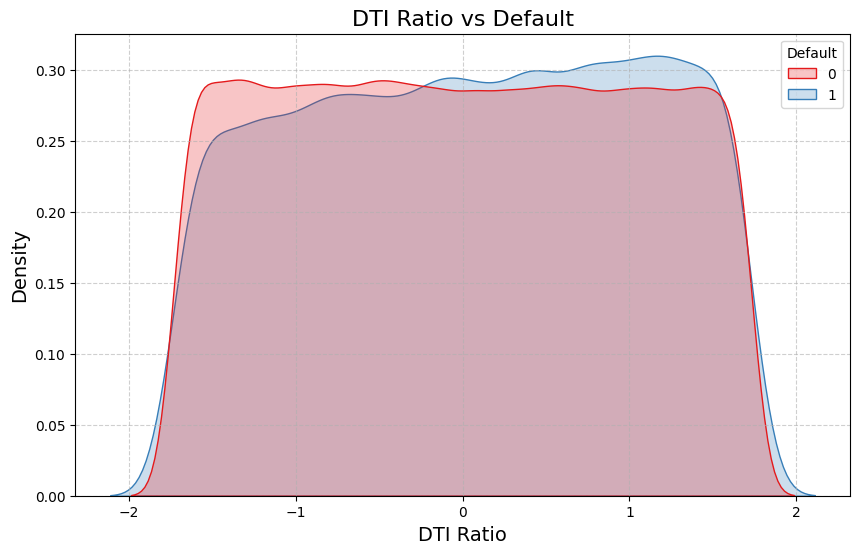


Default Rate by DTI Range:
DTI_bin
(0.0, 0.2]    0.119
(0.2, 0.4]    0.118
(0.4, 0.6]    0.119
(0.6, 0.8]    0.123
(0.8, 1.0]    0.123
Name: Default, dtype: float64


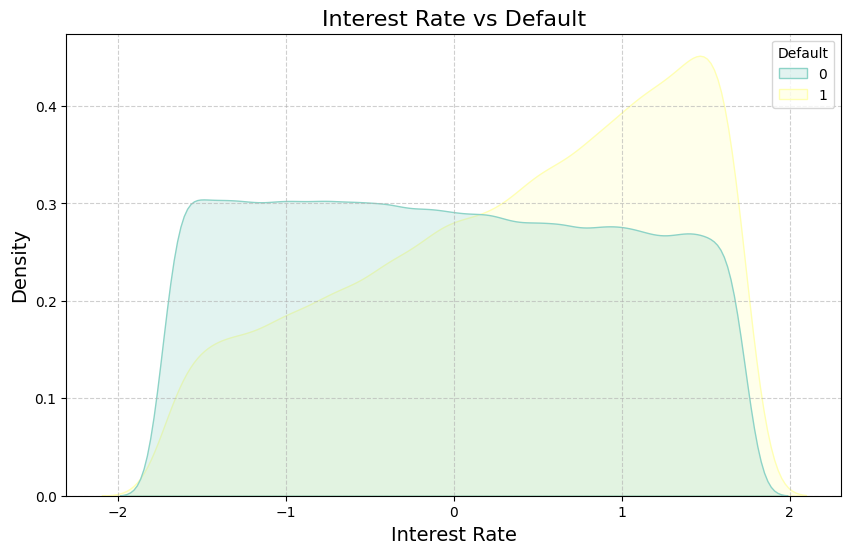


Default Rate by Interest Rate Group:
RateGroup
Low       0.070
Medium    0.111
High      0.167
Name: Default, dtype: float64


In [10]:
# Loop with enumerate to use different colors
for i, (col, title) in enumerate(features.items()):
    plt.figure(figsize = (10,6))

    if col in ["Income", "LoanAmount"]:
        #Box Plt
        sns.boxplot(data=df, x="Default", y=col, palette=[palette_list[i]])
        plt.ylabel(col, fontsize=14)

        plt.title(title, fontsize=16)
        plt.xlabel("Default (0 = No, 1 = Yes)", fontsize=14)
        plt.grid(True, linestyle="--", alpha=0.6)
        plt.show()

# 3. CreditScore vs Default
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x="CreditScore", hue="Default", common_norm=False, fill=True, palette="Set2")
plt.title("Credit Score vs Default", fontsize=16)
plt.xlabel("Credit Score", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Numeric summary: Default rate by credit score groups
df["CreditGroup"] = pd.qcut(df["CreditScore"], q=3, labels=["Low", "Medium", "High"])
print("\nDefault Rate by Credit Score Group:")
print(df.groupby("CreditGroup")["Default"].mean().round(3))


# 4. DTI Ratio vs Default
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x="DTIRatio", hue="Default", common_norm=False, fill=True, palette="Set1")
plt.title("DTI Ratio vs Default", fontsize=16)
plt.xlabel("DTI Ratio", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Numeric summary: Default rate by DTI bins
df["DTI_bin"] = pd.cut(df["DTIRatio"], bins=[0,0.2,0.4,0.6,0.8,1.0])
print("\nDefault Rate by DTI Range:")
print(df.groupby("DTI_bin")["Default"].mean().round(3))


# 5. Interest Rate vs Default
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x="InterestRate", hue="Default", common_norm=False, fill=True, palette="Set3")
plt.title("Interest Rate vs Default", fontsize=16)
plt.xlabel("Interest Rate", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Numeric summary: Default rate by interest rate groups
df["RateGroup"] = pd.qcut(df["InterestRate"], q=3, labels=["Low", "Medium", "High"])
print("\nDefault Rate by Interest Rate Group:")
print(df.groupby("RateGroup")["Default"].mean().round(3))


for col, title in features.items():
    plt.figure(figsize=(10,6))
    
    if col in ["Income", "LoanAmount"]:  
        sns.boxplot(x="Default", y=col, data=df, palette="Set2")
        
Q1: Income vs Default
→ Boxplot shows if defaulted customers (1) have lower income compared to non-defaulted (0).

Q2: LoanAmount vs Default
→ Boxplot shows if big loans or small loans are riskier.
Boxplots highlight median, spread, and outliers side by side for Default=0 and Default=1.

    else:
        sns.kdeplot(data=df, x=col, hue="Default", common_norm=False, fill=True)

Q3: CreditScore vs Default
→ KDE plot shows the distribution of Credit Scores for default vs non-default.
If the red (Default=1) curve is shifted left → low-credit borrowers default more.

Q4: DTIRatio vs Default
→ KDE plot shows at what DTI levels the red curve starts rising.
If defaults spike at higher DTI, you’ll see a “bulge” in that region.

Q5: InterestRate vs Default
→ KDE plot shows if high-interest loans correspond to more defaults.
If the Default=1 curve is higher at high rates → more risky.

  if col == "DTIRatio":
        df["DTI_bin"] = pd.cut(df[col], bins=[0,0.2,0.4,0.6,0.8,1.0])
        print("\nDefault Rate by DTI Range:")
        print(df.groupby("DTI_bin")["Default"].mean().round(3))
This numerically answers Q4:
“At what DTI threshold do we see sharp increases?”

summary:

Q1 + Q2 (Income, LoanAmount) → answered by boxplots.

Q3, Q4, Q5 (CreditScore, DTI, InterestRate) → answered by KDE plots.

Q4 (DTI) → also gets a table of default rates per DTI bin for exact thresholds.


What is DTIRatio?

DTI = Debt-to-Income Ratio
It’s a financial measure used by banks and lenders.

DTI Ratio
=
Total Monthly Debt Payments
Monthly Income
DTI Ratio=
Monthly Income
Total Monthly Debt Payments
	
    Numerator (Debt payments) = things like loan EMIs, credit card payments, car loan, etc.
    
    Denominator (Income) = borrower’s gross monthly income.

🔹 What does it mean?

DTI = 0.20 (20%)
→ 20% of income goes to debt payments. This is low risk.

DTI = 0.50 (50%)
→ Half the income goes to debt. This is riskier.

DTI > 0.6 (60%)
→ Very risky — borrower may struggle to pay new loans, higher chance of default.

That’s why lenders use DTI as a key approval factor.
Usually:

DTI < 0.35 → considered healthy.

DTI 0.36–0.49 → manageable but watch out.

DTI ≥ 0.5–0.6 → high risk, more defaults expected.

<h1>Categorical Variables vs Default</h1>

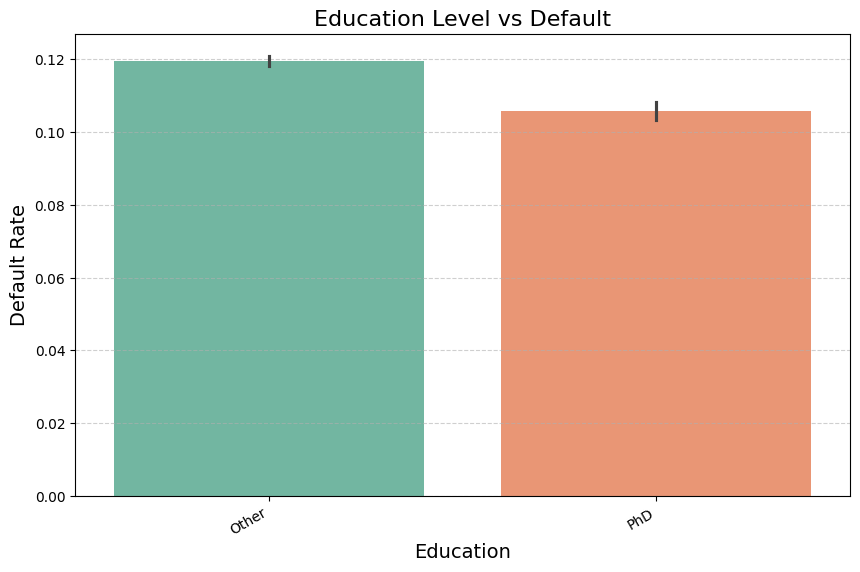


--- Education Level vs Default Summary ---
Education
Other    0.120
PhD      0.106
Name: Default, dtype: float64


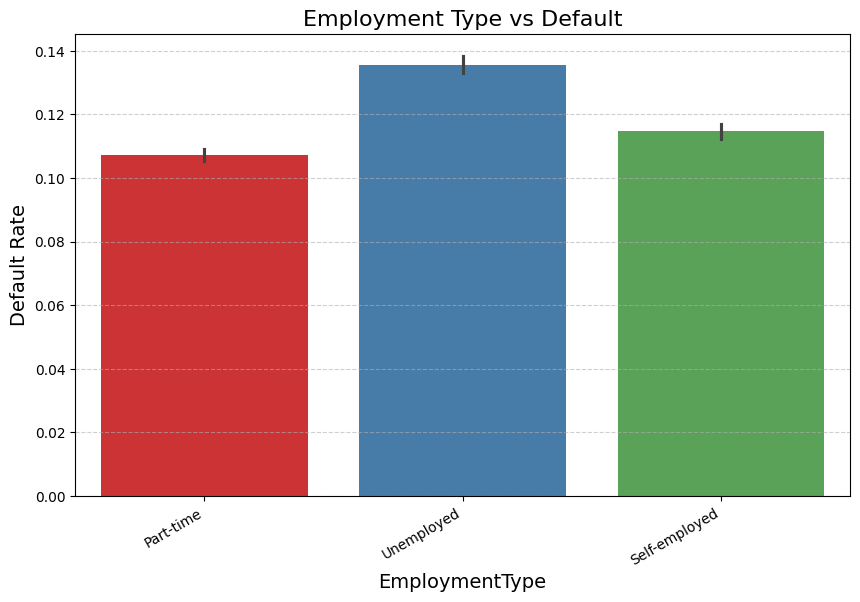


--- Employment Type vs Default Summary ---
EmploymentType
Part-time        0.107
Self-employed    0.115
Unemployed       0.136
Name: Default, dtype: float64


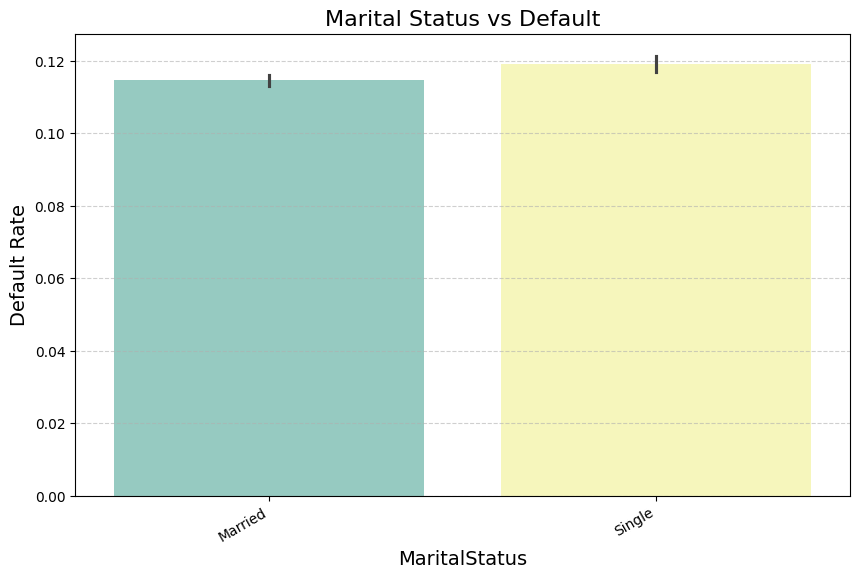


--- Marital Status vs Default Summary ---
MaritalStatus
Married    0.115
Single     0.119
Name: Default, dtype: float64


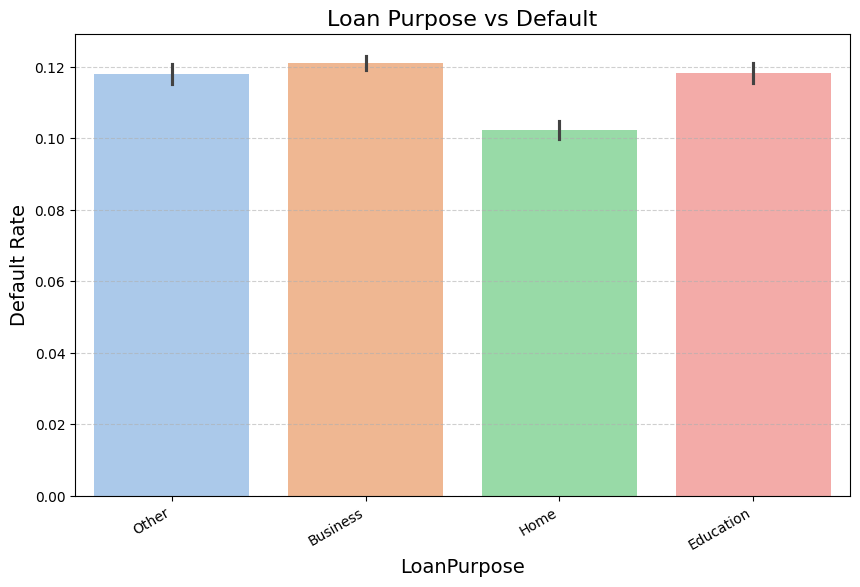


--- Loan Purpose vs Default Summary ---
LoanPurpose
Business     0.121
Education    0.118
Home         0.102
Other        0.118
Name: Default, dtype: float64


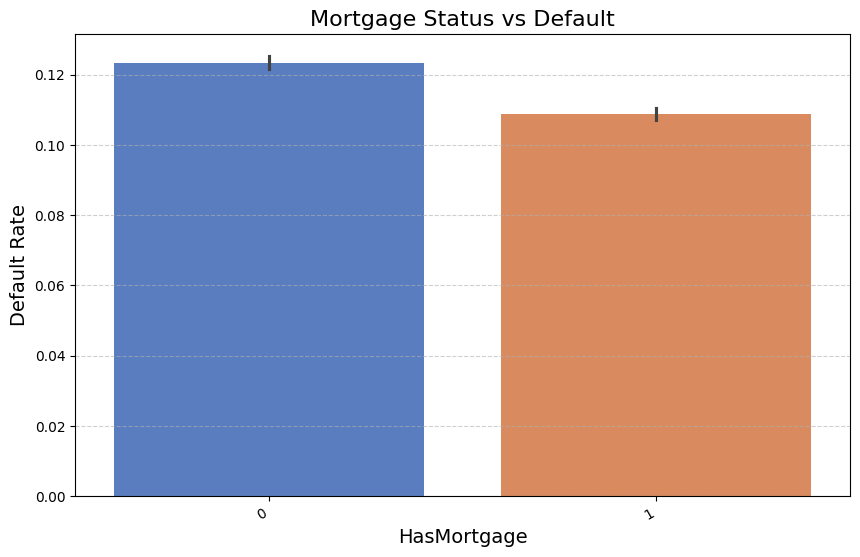


--- Mortgage Status vs Default Summary ---
HasMortgage
0    0.123
1    0.109
Name: Default, dtype: float64


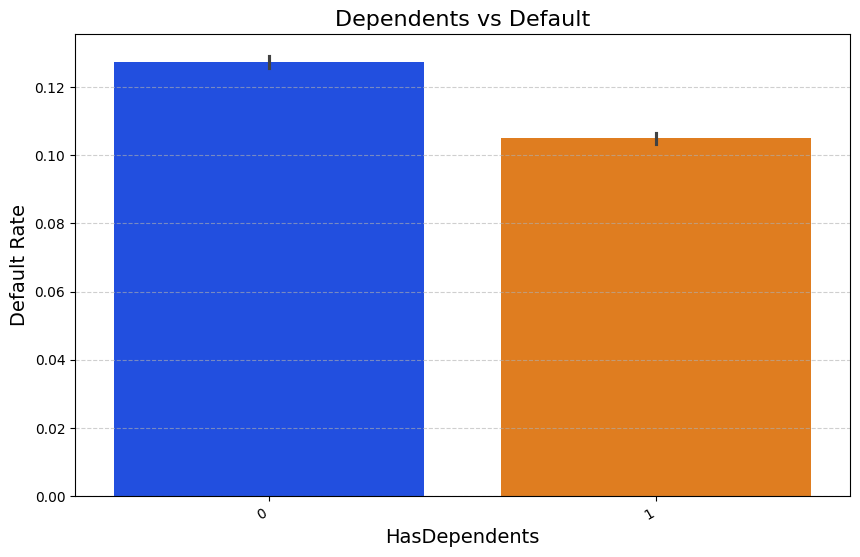


--- Dependents vs Default Summary ---
HasDependents
0    0.127
1    0.105
Name: Default, dtype: float64


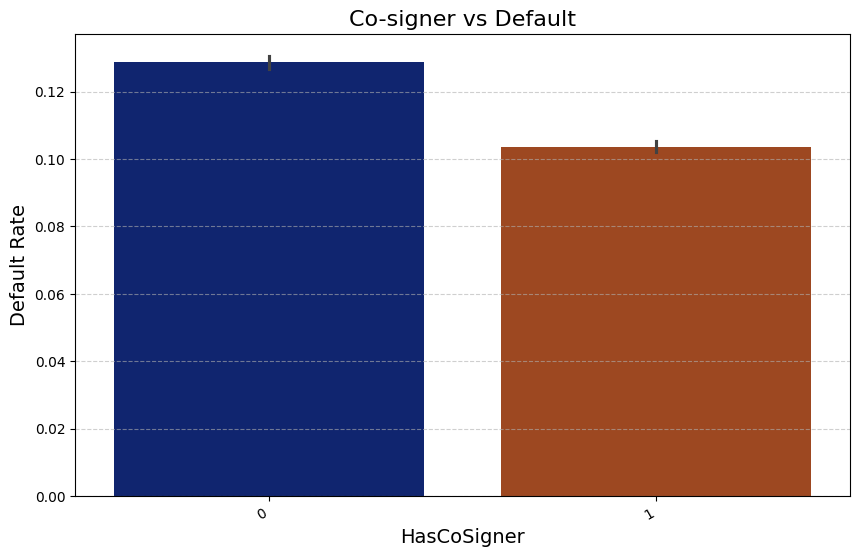


--- Co-signer vs Default Summary ---
HasCoSigner
0    0.129
1    0.104
Name: Default, dtype: float64


In [12]:
# ------------------------------
#Reconstruct categorical variables from one-hot encoding
# ------------------------------

# Education (example only PhD present → else = Other)
df["Education"] = df[["Education_PhD"]].apply(lambda row: "PhD" if row["Education_PhD"] == 1 else "Other", axis=1)

# EmploymentType
df["EmploymentType"] = df[["EmploymentType_Part-time", "EmploymentType_Self-employed", "EmploymentType_Unemployed"]].idxmax(axis=1).str.replace("EmploymentType_", "")

# MaritalStatus
df["MaritalStatus"] = df[["MaritalStatus_Married", "MaritalStatus_Single"]].idxmax(axis=1).str.replace("MaritalStatus_", "")

# LoanPurpose
df["LoanPurpose"] = df[["LoanPurpose_Business", "LoanPurpose_Education", "LoanPurpose_Home", "LoanPurpose_Other"]].idxmax(axis=1).str.replace("LoanPurpose_", "")

# Define categorical variables and titles
cat_cols = {
    "Education": "Education Level vs Default",
    "EmploymentType": "Employment Type vs Default",
    "MaritalStatus": "Marital Status vs Default",
    "LoanPurpose": "Loan Purpose vs Default",
    "HasMortgage": "Mortgage Status vs Default",
    "HasDependents": "Dependents vs Default",
    "HasCoSigner": "Co-signer vs Default"
}

# Different color palettes for variety
palettes = ["Set2", "Set1", "Set3", "pastel", "muted", "bright", "dark"]

# Loop through each categorical variable
for i, (col, title) in enumerate(cat_cols.items()):
    if col in df.columns:
        plt.figure(figsize=(10,6))
        sns.barplot(
            x=col, 
            y="Default", 
            data=df, 
            estimator=lambda x: sum(x)/len(x),  # default rate
            palette=palettes[i % len(palettes)]
        )
        plt.title(title, fontsize=16)
        plt.ylabel("Default Rate", fontsize=14)
        plt.xlabel(col, fontsize=14)
        plt.xticks(rotation=30, ha="right")
        plt.grid(axis="y", linestyle="--", alpha=0.6)
        plt.show()

        # Print summary table
        print(f"\n--- {title} Summary ---")
        print(df.groupby(col)["Default"].mean().round(3))

Education → Barplot shows default rates by education level.

EmploymentType → Compares salaried vs self-employed default rates.

MaritalStatus → Single vs married borrowers.

LoanPurpose → Default rates by loan purpose (Home, Car, Business, etc.).

HasMortgage → Compares borrowers with and without mortgage.

HasDependents → Checks if dependents increase default risk.

HasCoSigner → Compares default rates with vs without co-signer.

<h1>Correlation Heatmap</h1>

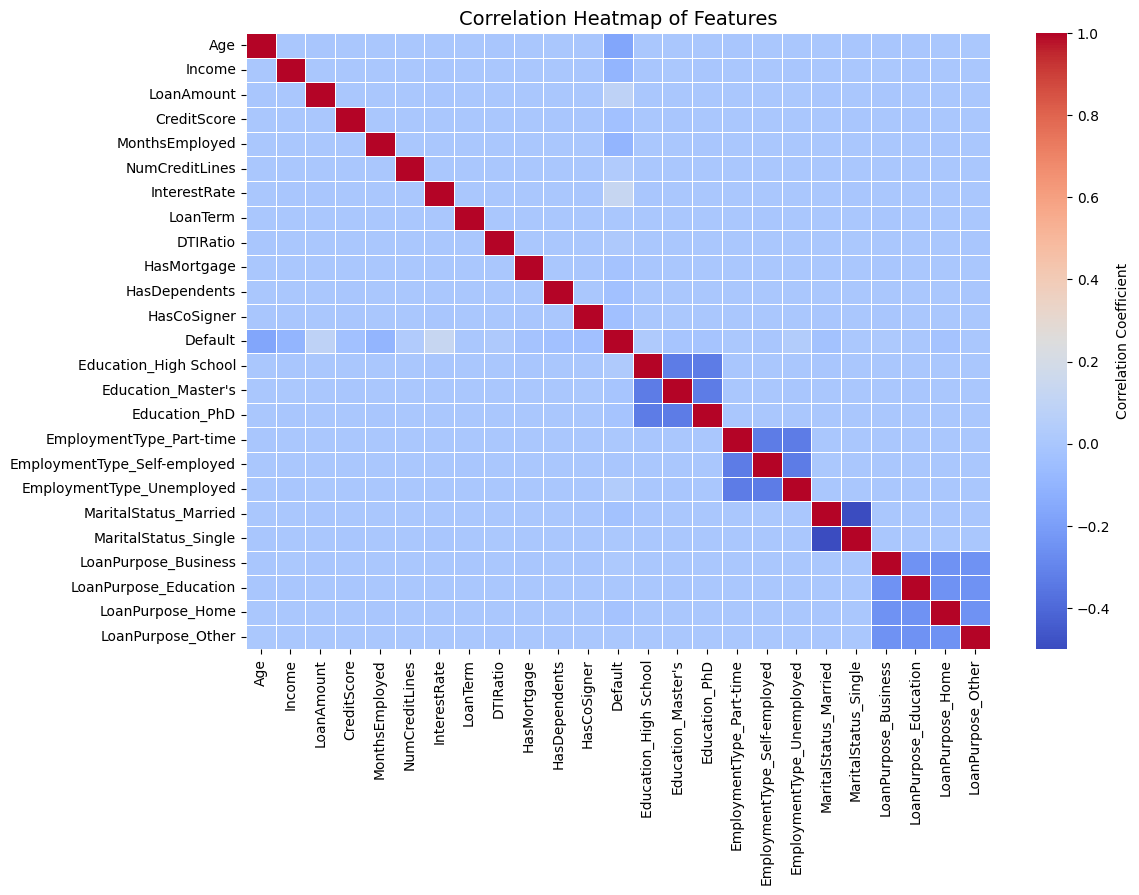


Correlation of each feature with Default:

Default                         1.000000
InterestRate                    0.131273
LoanAmount                      0.086659
EmploymentType_Unemployed       0.034957
NumCreditLines                  0.028330
Education_High School           0.022831
DTIRatio                        0.019236
LoanPurpose_Business            0.011162
MaritalStatus_Single            0.006607
EmploymentType_Part-time        0.006372
LoanPurpose_Education           0.003512
LoanPurpose_Other               0.002737
LoanTerm                        0.000545
EmploymentType_Self-employed   -0.002714
Education_Master's             -0.013314
Education_PhD                  -0.018447
LoanPurpose_Home               -0.021564
HasMortgage                    -0.022856
MaritalStatus_Married          -0.026875
CreditScore                    -0.034166
HasDependents                  -0.034678
HasCoSigner                    -0.039109
MonthsEmployed                 -0.097374
Income       

In [15]:
#Compute correlation matrix
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr,
    cmap="coolwarm",          # color scheme
    annot=False,              # set True if you want numbers inside
    fmt=".2f", 
    linewidths=0.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title("Correlation Heatmap of Features", fontsize=14)
plt.show()

#Top correlations with Default (feature importance)
default_corr = corr["Default"].sort_values(ascending=False)
print("\nCorrelation of each feature with Default:\n")
print(default_corr)

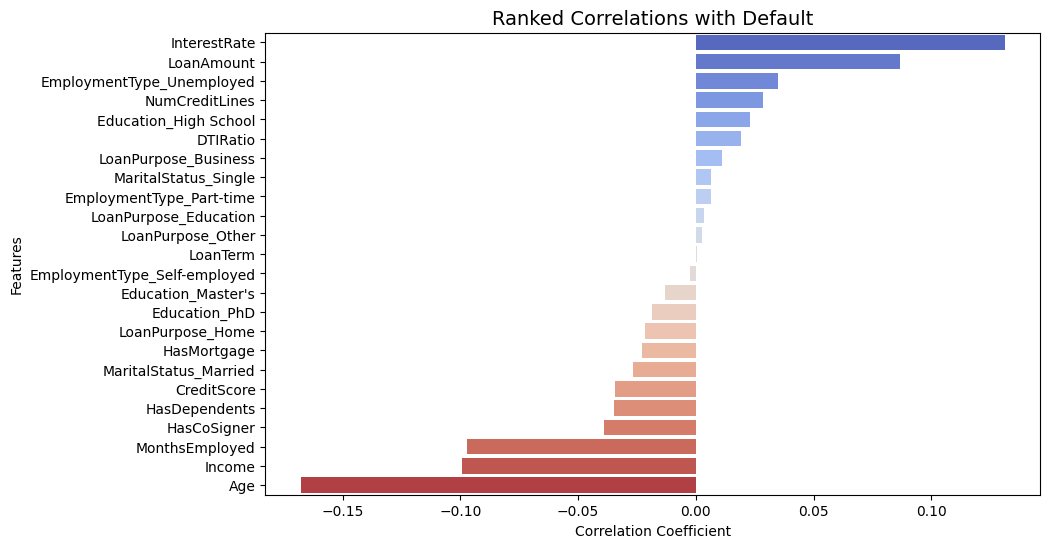

In [16]:
#Optional
#A ranked barplot will clearly show which features have the strongest positive or negative correlation with Default
# Get correlations with Default
default_corr = corr["Default"].drop("Default").sort_values(ascending=False)

# Plot ranked barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=default_corr.values, y=default_corr.index, palette="coolwarm")
plt.title("Ranked Correlations with Default", fontsize=14)
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.show()